In [1]:
from braket.aws import AwsDevice
from braket.pulse import PulseSequence, ArbitraryWaveform, GaussianWaveform

from braket.circuits import Circuit
import braket.circuits.circuit as circuit

In [22]:
a=0 #specifies the control qubit
b=103 #specifies the target qubit
device = AwsDevice("arn:aws:braket:us-west-1::device/qpu/rigetti/Aspen-M-3")

In [23]:
import numpy as np
import matplotlib.pyplot as plt
@circuit.subroutine(register=True)
def rigetti_native_h(q0):
    return (
        Circuit()
        .rz(q0, np.pi)
        .rx(q0, np.pi/2)
        .rz(q0, np.pi/2)
        .rx(q0, -np.pi/2)
    )

In [24]:
a_b_cz_wfm = ArbitraryWaveform([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00017888439538396808, 0.00046751103636033026, 0.0011372942989106456, 0.002577059611929697, 0.005443941944632366, 0.010731922770068104, 0.01976701723583167, 0.03406712171899736, 0.05503285980691202, 0.08350670755829034, 0.11932853352131022, 0.16107456696238298, 0.20614055551722368, 0.2512065440720643, 0.292952577513137, 0.328774403476157, 0.3572482512275353, 0.3782139893154499, 0.3925140937986156, 0.40154918826437913, 0.4068371690898149, 0.4097040514225177, 0.41114381673553674, 0.411813599998087, 0.4121022266390633, 0.4122174383870584, 0.41226003881132406, 0.4122746298554775, 0.4122792591252675, 0.4122806196003006, 0.41228098995582513, 0.41228108334474756, 0.4122811051578895, 0.4122811098772742, 0.4122811108230642, 0.4122811109986316, 0.41228111102881937, 0.41228111103362725, 0.4122811110343365, 0.41228111103443343, 0.4122811110344457, 0.4122811110344471, 0.41228111103444737, 0.41228111103444737, 0.41228111103444737, 0.41228111103444737, 0.41228111103444737, 0.41228111103444737, 0.41228111103444737, 0.41228111103444737, 0.41228111103444737, 0.41228111103444737, 0.41228111103444737, 0.41228111103444737, 0.41228111103444737, 0.41228111103444737, 0.41228111103444737, 0.41228111103444737, 0.41228111103444737, 0.41228111103444737, 0.41228111103444737, 0.41228111103444737, 0.41228111103444737, 0.41228111103444737, 0.41228111103444737, 0.41228111103444737, 0.41228111103444737, 0.4122811110344471, 0.4122811110344457, 0.41228111103443343, 0.4122811110343365, 0.41228111103362725, 0.41228111102881937, 0.4122811109986316, 0.4122811108230642, 0.4122811098772742, 0.4122811051578895, 0.41228108334474756, 0.41228098995582513, 0.4122806196003006, 0.4122792591252675, 0.4122746298554775, 0.41226003881132406, 0.4122174383870584, 0.4121022266390633, 0.411813599998087, 0.41114381673553674, 0.4097040514225176, 0.4068371690898149, 0.40154918826437913, 0.3925140937986155, 0.37821398931544986, 0.3572482512275351, 0.32877440347615655, 0.2929525775131368, 0.2512065440720641, 0.20614055551722307, 0.16107456696238268, 0.11932853352131002, 0.08350670755829034, 0.05503285980691184, 0.03406712171899729, 0.01976701723583167, 0.010731922770068058, 0.005443941944632366, 0.002577059611929697, 0.0011372942989106229, 0.00046751103636033026, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
a_b_cz_frame = device.frames[f'q{a}_q{b}_cz_frame']

dt = a_b_cz_frame.port.dt
a_b_cz_wfm_duration = len(a_b_cz_wfm.amplitudes)*dt
print('CZ pulse duration:', a_b_cz_wfm_duration*1e9, 'ns')

CZ pulse duration: 124.0 ns


In [25]:
phase_shift_a=1.1733407221086924
phase_shift_b=6.269846678712192

a_rf_frame = device.frames[f'q{a}_rf_frame']
b_rf_frame = device.frames[f'q{b}_rf_frame']

frames = [a_rf_frame, b_rf_frame, a_b_cz_frame]

cz_pulse_sequence = (
    PulseSequence()
    .barrier(frames)
    .play(a_b_cz_frame, a_b_cz_wfm)
    .delay(a_rf_frame, a_b_cz_wfm_duration)
    .shift_phase(a_rf_frame, phase_shift_a)
    .delay(b_rf_frame, a_b_cz_wfm_duration)
    .shift_phase(b_rf_frame, phase_shift_b)
    .barrier(frames)
)

In [26]:
bell_circuit_pulse = (
    Circuit()
    .rigetti_native_h(a)
    .rigetti_native_h(b)
    .pulse_gate([a, b], cz_pulse_sequence)
    .rigetti_native_h(b)
)
print(bell_circuit_pulse)

T    : |   0    |   1    |   2    |    3    |4 |   5    |   6    |   7    |    8    |
                                                                                     
q0   : -Rz(3.14)-Rx(1.57)-Rz(1.57)-Rx(-1.57)-PG--------------------------------------
                                             |                                       
q103 : -Rz(3.14)-Rx(1.57)-Rz(1.57)-Rx(-1.57)-PG-Rz(3.14)-Rx(1.57)-Rz(1.57)-Rx(-1.57)-

T    : |   0    |   1    |   2    |    3    |4 |   5    |   6    |   7    |    8    |


<BarContainer object of 4 artists>

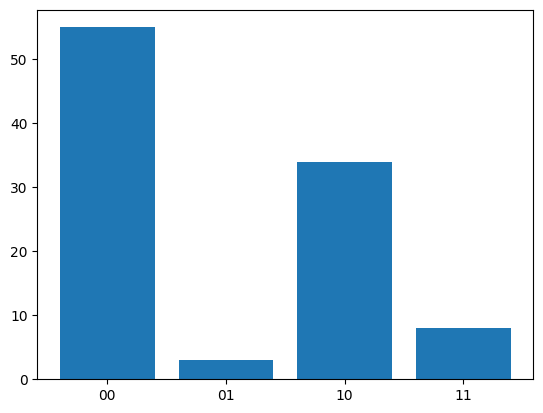

In [27]:
task = device.run(bell_circuit_pulse, shots=100)

counts = task.result().measurement_counts

plt.bar(sorted(counts), [counts[k] for k in sorted(counts)])